# Basic Seurat Analysis
This analysis is based on the tutorial found at https://satijalab.org/seurat/articles/pbmc3k_tutorial.html

A full list of available tutorials can be found at https://satijalab.org/seurat/articles/get_started.html

In [1]:
# Load Seurat and additional libraries
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(Seurat))

## Create data directory
Edit the first line in the cell below with the path to your data and the second line with the name of your project

In [2]:
dir <- "/Users/sicklera/data/985/aggr_test_aggr_filtered_feature_bc_matrix"
project_name <- "test_seurat_project"
data_dir <- file.path(dir)

## Seurat Parameters
Edit these parameters to change the way Seurat filters the data and does clustering

In [3]:
plot_size <- 500
out_size <- 20 # Number of genes to include in the cluster output file
min_cells <- 3 # Number of cells a feature must be present in to retain
min_features <- 200 # Minimum number of genes observed in a cell to retain
max_features <- 2500 # Maximum number of genes observed in a cell to retain
max_mt <- 5 # Maximum mitochondrial percentage observed in a cell to retain
norm_method <- "LogNormalize" # Normalization to apply to counts (LogNormalize, CLR, RC)
retain_features <- 2000 # Number of most-variable features to initially retain
nheatmap <- 10 # Number of principal components for which to produce heatmaps
num_pcs <- 10 # Number of principal components to retain for clustering
knn_granularity <- 0.5 # KNN clustering granularity parameter

## Create Seurat Object and Filter For min cells and features

In [4]:
analysis.data <- Read10X(data.dir = data_dir)
analysis <- CreateSeuratObject(counts = analysis.data, project = project_name,
            min.cells = min_cells, min.features = min_features)

## Visualize QC and further filter data

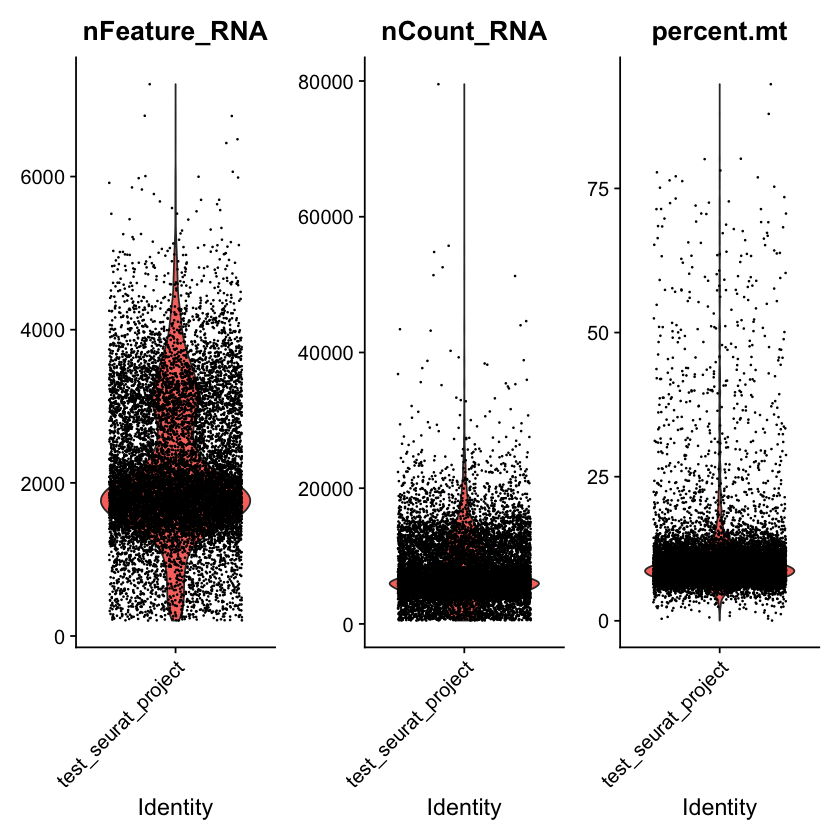

In [5]:
analysis[["percent.mt"]] <- PercentageFeatureSet(analysis, pattern = "^MT-")
VlnPlot(analysis, features = c("nFeature_RNA", "nCount_RNA",
            "percent.mt"), ncol = 3)

In [6]:
analysis <- subset(analysis, subset = nFeature_RNA > min_features & nFeature_RNA < max_features
            & percent.mt < max_mt)

In [7]:
# Summarize data post filtering
analysis

An object of class Seurat 
20462 features across 207 samples within 1 assay 
Active assay: RNA (20462 features, 0 variable features)

## Normalize data and Identify highly variable genes

In [8]:
analysis <- NormalizeData(analysis, normalization.method = norm_method,
            scale.factor = 10000)
analysis <- FindVariableFeatures(analysis, selection.method = "vst",
            nfeatures = retain_features)
top10 <- head(VariableFeatures(analysis), 10)
top10

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.0149”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  8.0231e-16”


[1] "PPBP"    "S100A9"  "NKG7"    "S100A8"  "PF4"     "NRGN"    "LYZ"    
 [8] "TSC22D1" "PTCRA"   "TUBB1"

## Plot variable features with labels

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”


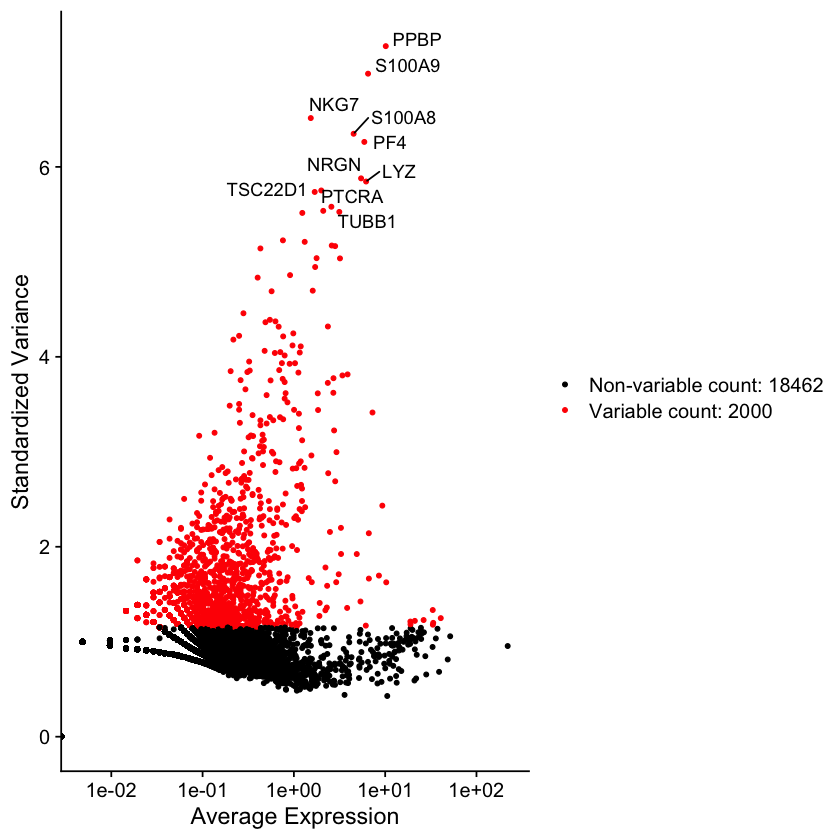

In [9]:
plot1 <- VariableFeaturePlot(analysis)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

## Scale Data

In [10]:
all.genes <- rownames(analysis)
analysis <- ScaleData(analysis, features = all.genes)

Centering and scaling data matrix



## Perform and Visualize Linear PCA

In [11]:
analysis <- RunPCA(analysis, features = VariableFeatures(object = analysis))

PC_ 1 
Positive:  TUBB1, GP9, PPBP, CAVIN2, GNG11, PF4, TMEM40, TSC22D1, ACRBP, PTCRA 
	   NRGN, RGS18, MPP1, CMTM5, MTURN, HIST1H2AC, PRKAR2B, CTTN, LMNA, MMD 
	   SPARC, C2orf88, MAP3K7CL, PDLIM1, TREML1, ESAM, RAB32, CLDN5, TSPAN33, CD9 
Negative:  RPLP1, RPL13, RPS6, RPS18, RPS14, RPS12, RPS29, RPS27, LTB, NEAT1 
	   CD37, TRBC2, S100A4, S100A6, IL32, FOS, TRAC, ARL4C, CALR, IL7R 
	   DUSP1, IRF1, SYNE2, SLFN5, CD7, CD81, CD74, S1PR4, ANXA1, ZFP36 
PC_ 2 
Positive:  TRAC, LTB, IL32, TRBC2, IL7R, SLFN5, SYNE2, TRBC1, NOSIP, RORA 
	   ARL4C, CD7, ITM2A, AC058791.1, AQP3, RPS29, CCR7, MAL, LEF1, AAK1 
	   ATP6V0E2, GZMM, PBXIP1, LAT, RPS27, CALR, PIM2, CAMK4, ODF2L, INTS6 
Negative:  MNDA, FCN1, CSTA, S100A8, LYZ, TYROBP, S100A12, CTSS, S100A9, CLEC7A 
	   CSF3R, FGL2, AC020656.1, CST3, PSAP, FPR1, MS4A6A, VCAN, CD14, AIF1 
	   GRN, CYBB, CEBPD, TYMP, FCER1G, MPEG1, TGFBI, NCF2, RGS2, CPVL 
PC_ 3 
Positive:  MS4A1, IGHM, CD79A, IGHD, LINC00926, CD22, SNX22, HLA-DQA1, RALGPS2, TNFRSF13

In [12]:
print(analysis[["pca"]], dims = 1:7, nfeatures = out_size)

PC_ 1 
Positive:  TUBB1, GP9, PPBP, CAVIN2, GNG11, PF4, TMEM40, TSC22D1, ACRBP, PTCRA 
	   NRGN, RGS18, MPP1, CMTM5, MTURN, HIST1H2AC, PRKAR2B, CTTN, LMNA, MMD 
Negative:  RPLP1, RPL13, RPS6, RPS18, RPS14, RPS12, RPS29, RPS27, LTB, NEAT1 
	   CD37, TRBC2, S100A4, S100A6, IL32, FOS, TRAC, ARL4C, CALR, IL7R 
PC_ 2 
Positive:  TRAC, LTB, IL32, TRBC2, IL7R, SLFN5, SYNE2, TRBC1, NOSIP, RORA 
	   ARL4C, CD7, ITM2A, AC058791.1, AQP3, RPS29, CCR7, MAL, LEF1, AAK1 
Negative:  MNDA, FCN1, CSTA, S100A8, LYZ, TYROBP, S100A12, CTSS, S100A9, CLEC7A 
	   CSF3R, FGL2, AC020656.1, CST3, PSAP, FPR1, MS4A6A, VCAN, CD14, AIF1 
PC_ 3 
Positive:  MS4A1, IGHM, CD79A, IGHD, LINC00926, CD22, SNX22, HLA-DQA1, RALGPS2, TNFRSF13C 
	   BANK1, SPIB, SWAP70, TCL1A, FAM129C, BCL11A, CD19, IGKC, BLK, PLPP5 
Negative:  ANXA1, IL32, S100A4, KLRD1, NKG7, TRAC, ID2, PRF1, GZMM, KLRF1 
	   RORA, CTSW, CD7, GZMA, SPON2, FGFBP2, CX3CR1, S1PR5, LGALS1, NEAT1 
PC_ 4 
Positive:  IL7R, LTB, MAL, TRAC, CCR7, LEF1, CAMK4, TSHZ2, A

Warning message:
“Requested number is larger than the number of available items (207). Setting to 207.”
Warning message:
“Requested number is larger than the number of available items (207). Setting to 207.”
Warning message:
“Requested number is larger than the number of available items (207). Setting to 207.”
Warning message:
“Requested number is larger than the number of available items (207). Setting to 207.”
Warning message:
“Requested number is larger than the number of available items (207). Setting to 207.”
Warning message:
“Requested number is larger than the number of available items (207). Setting to 207.”
Warning message:
“Requested number is larger than the number of available items (207). Setting to 207.”
Warning message:
“Requested number is larger than the number of available items (207). Setting to 207.”
Warning message:
“Requested number is larger than the number of available items (207). Setting to 207.”
Warning message:
“Requested number is larger than the number of 

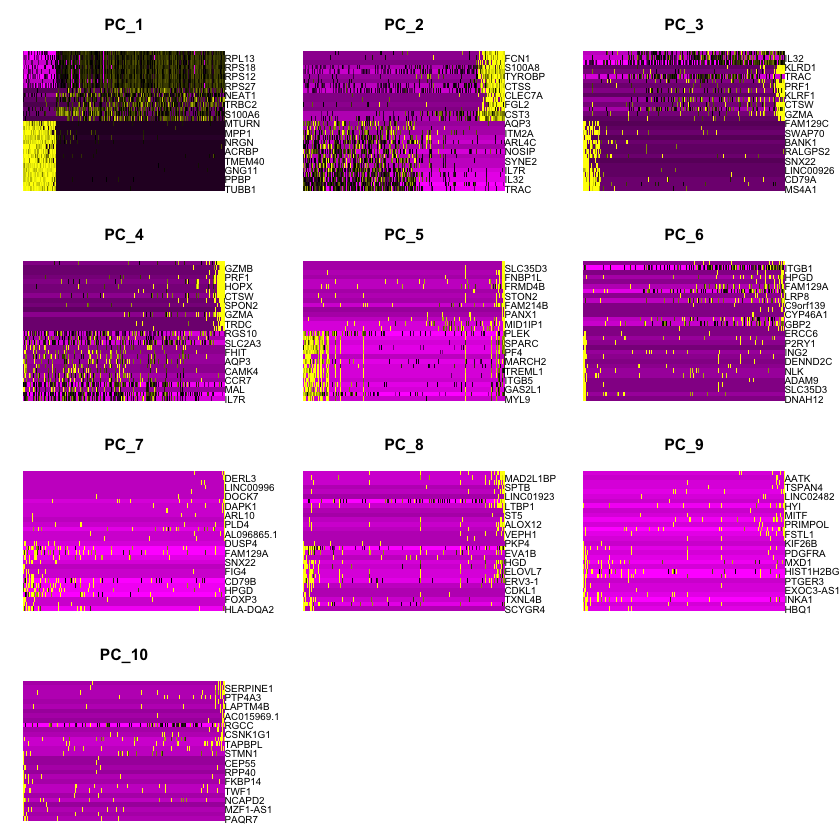

In [13]:
# create a heat map with the PCs.
# this may produce a warning if there are less than 500 cells in analysis
# If this is the case, Seurat will default to the number of cells.
DimHeatmap(analysis, dims = 1:nheatmap, cells = 500, balanced = TRUE)

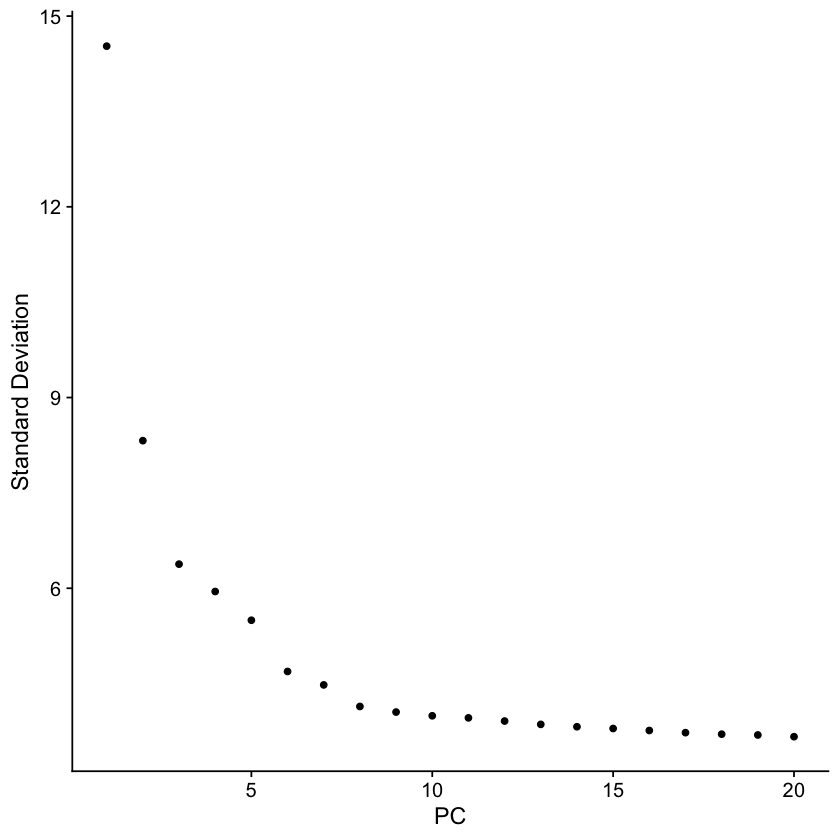

In [14]:
ElbowPlot(analysis)

## Cluster cells

In [15]:
analysis <- FindNeighbors(analysis, dims = 1:num_pcs)
analysis <- FindClusters(analysis, resolution = knn_granularity)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 207
Number of edges: 5114

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7805
Number of communities: 5
Elapsed time: 0 seconds


## Run and Visualize UMAP

In [16]:
# the first time this is run, Seurat will produce a warning stating the method for umap has changed
analysis <- RunUMAP(analysis, dims = 1:num_pcs)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:13:51 UMAP embedding parameters a = 0.9922 b = 1.112

15:13:51 Read 207 rows and found 10 numeric columns

15:13:51 Using Annoy for neighbor search, n_neighbors = 30

15:13:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:13:52 Writing NN index file to temp file /var/folders/x4/tv9g7gjx45q776_rymb3y2wnmlbd5w/T//RtmpNv7CAy/file4a5c637c3a38

15:13:52 Searching Annoy index using 1 thread, search_k = 3000

15:13:52 Annoy recall = 100%

15:13:52 Commencing smooth kNN distance calibrati

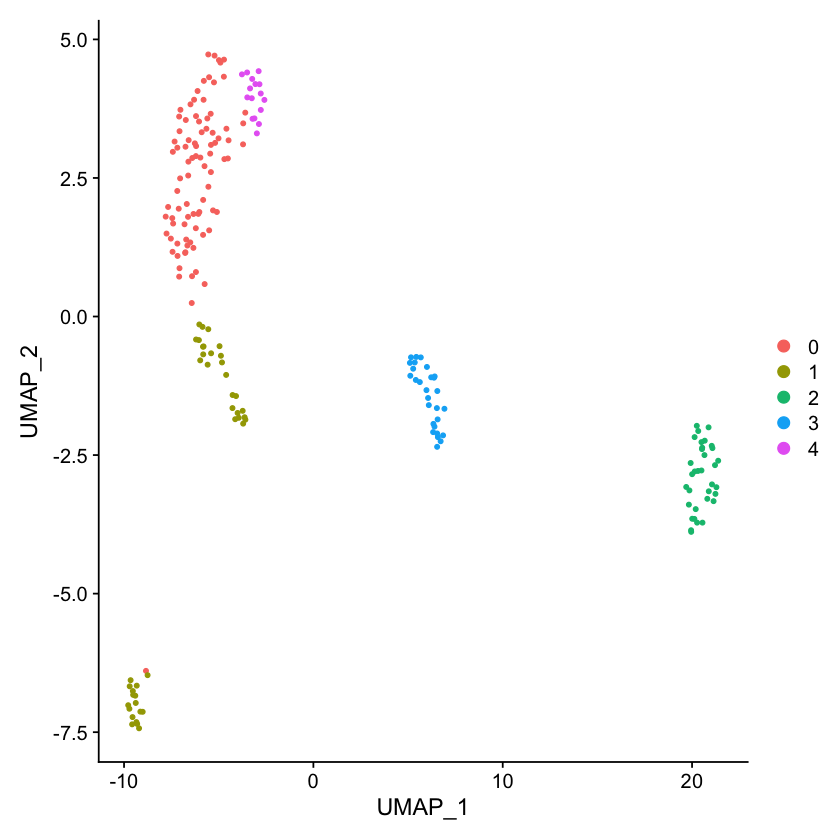

In [17]:
DimPlot(analysis, reduction = "umap")

## Find cluster markers

In [18]:
analysis.markers <- FindAllMarkers(analysis, only.pos = TRUE, min.pct = 0.25,
            logfc.threshold = 0.25)
cluster_markers <- analysis.markers %>% group_by(cluster) %>% top_n(n = out_size, wt = avg_log2FC)
cluster_markers

Calculating cluster 0

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
2.043461e-27,1.667285,1.000,0.833,4.181329e-23,0,RPS12
8.549154e-26,1.495390,1.000,0.892,1.749328e-21,0,RPS27
1.104792e-24,1.410604,1.000,0.817,2.260626e-20,0,RPS3A
2.936753e-24,1.432962,1.000,0.742,6.009184e-20,0,RPS3
6.173563e-24,1.387426,1.000,0.800,1.263234e-19,0,RPL32
1.180408e-23,1.559941,1.000,0.692,2.415350e-19,0,RPS29
1.846593e-23,1.489581,0.989,0.742,3.778498e-19,0,RPS6
9.129797e-23,1.433338,1.000,0.750,1.868139e-18,0,RPS14
1.462096e-22,1.396410,1.000,0.783,2.991740e-18,0,RPS18


## Visualize cluster markers

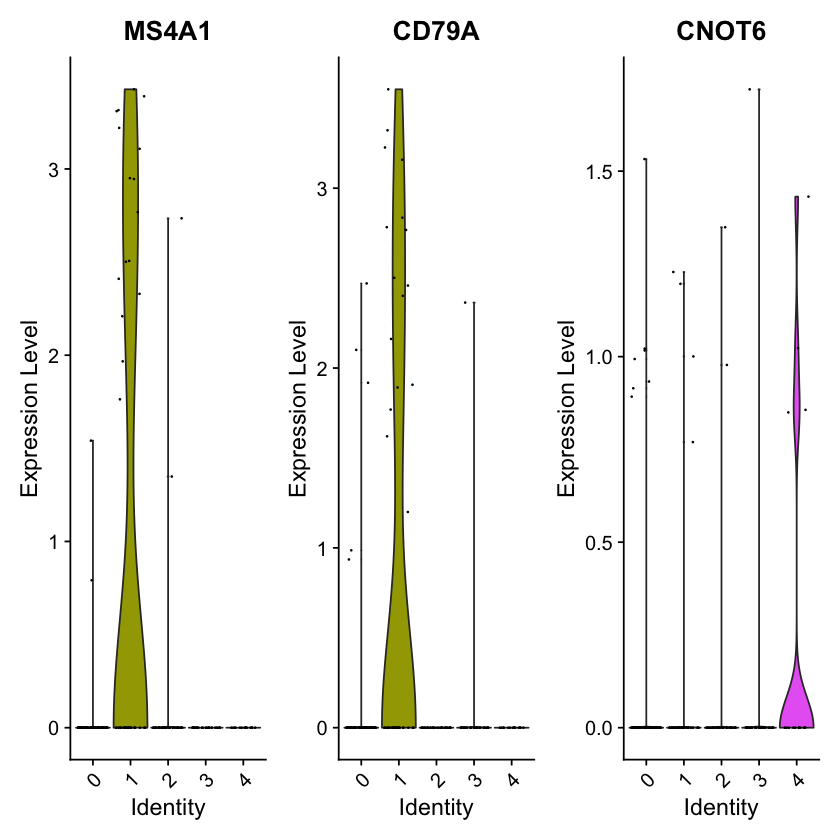

In [19]:
# Visualize markers using violin plots
# Note: the plot gets more and more squished with higher numbers of clusters and genes
gene_list = c("MS4A1", "CD79A", "CNOT6")
VlnPlot(analysis, features = gene_list)

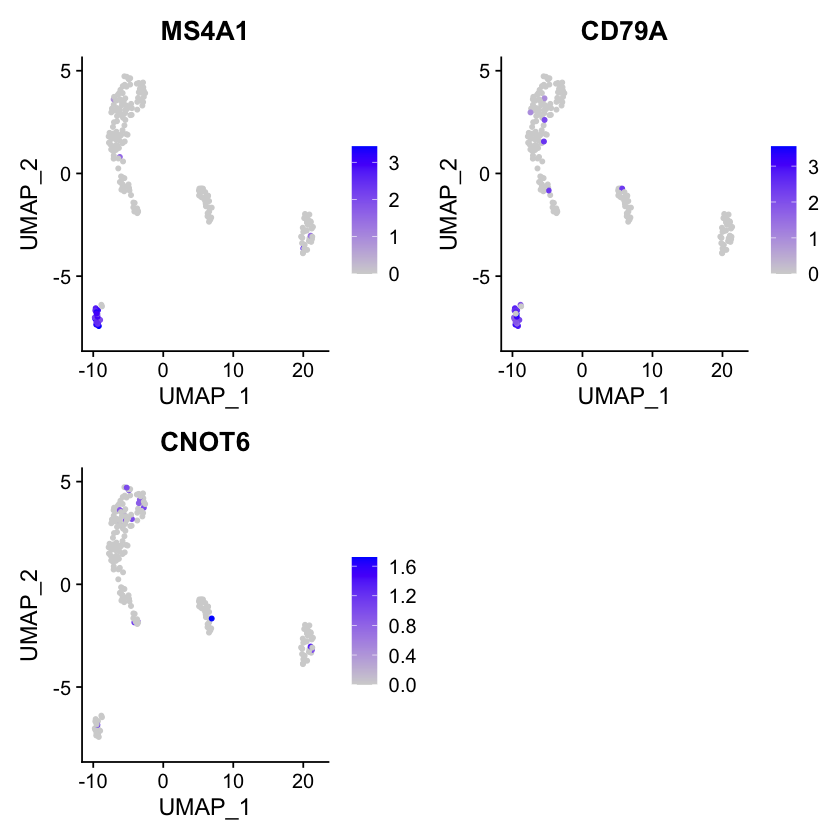

In [20]:
# Visualize using feature plot
FeaturePlot(analysis, features = gene_list)

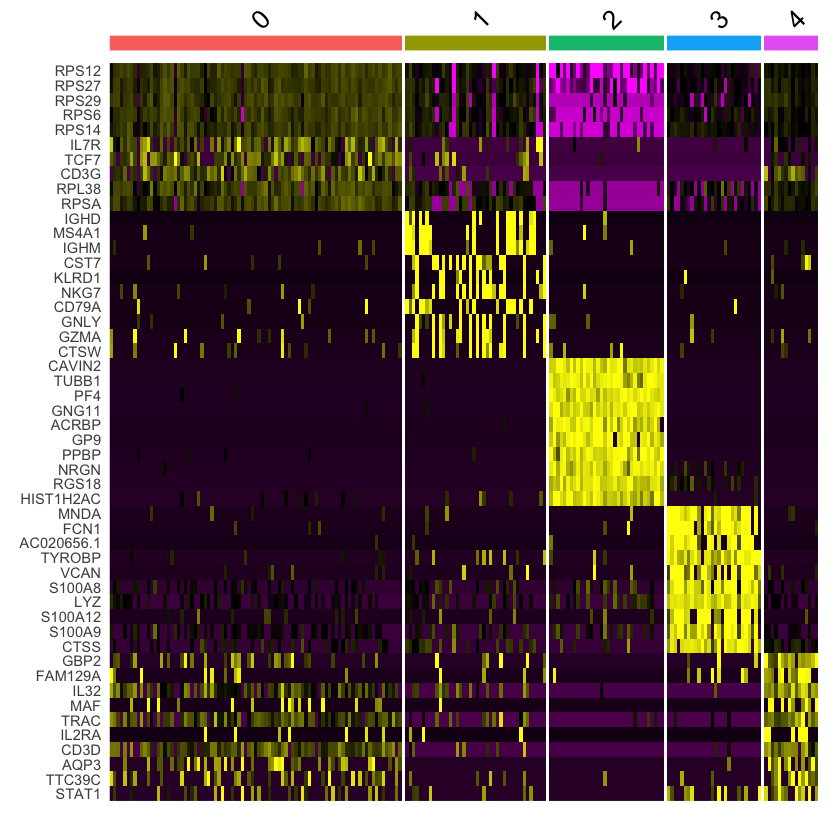

In [21]:
# Visualize using expression heat map
top10 <- analysis.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
DoHeatmap(analysis, features = top10$gene) + NoLegend()

## Save Seurat Object for Later use

In [22]:
out_file <- "/Users/sicklera/data/985/seurat_test.rds"
saveRDS(analysis, file = out_file)